# 1. Загрузить файл hr.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
hr=pd.read_csv('hr.csv')

In [3]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [5]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [6]:
hr_corr=hr.corr()

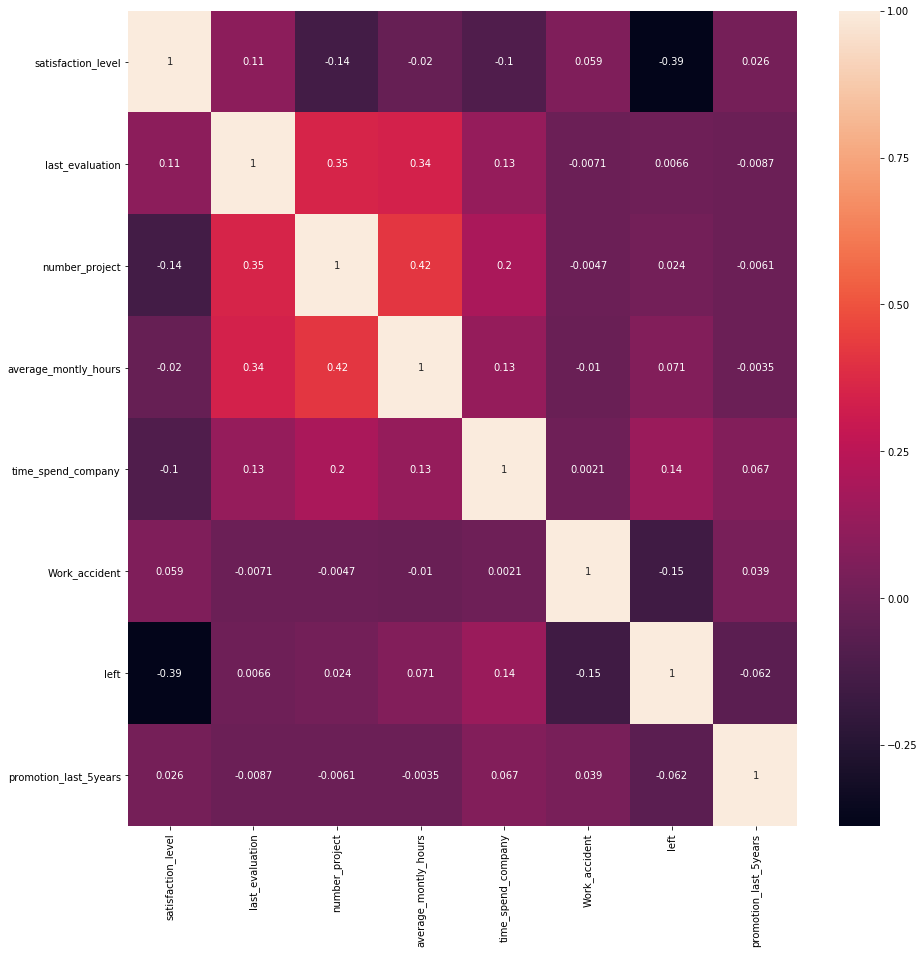

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(hr_corr, ax=ax, annot=True,
            xticklabels=hr_corr.columns.values,
            yticklabels=hr_corr.columns.values)

# 4. Визуализировать несколько взаимосвязей между переменными

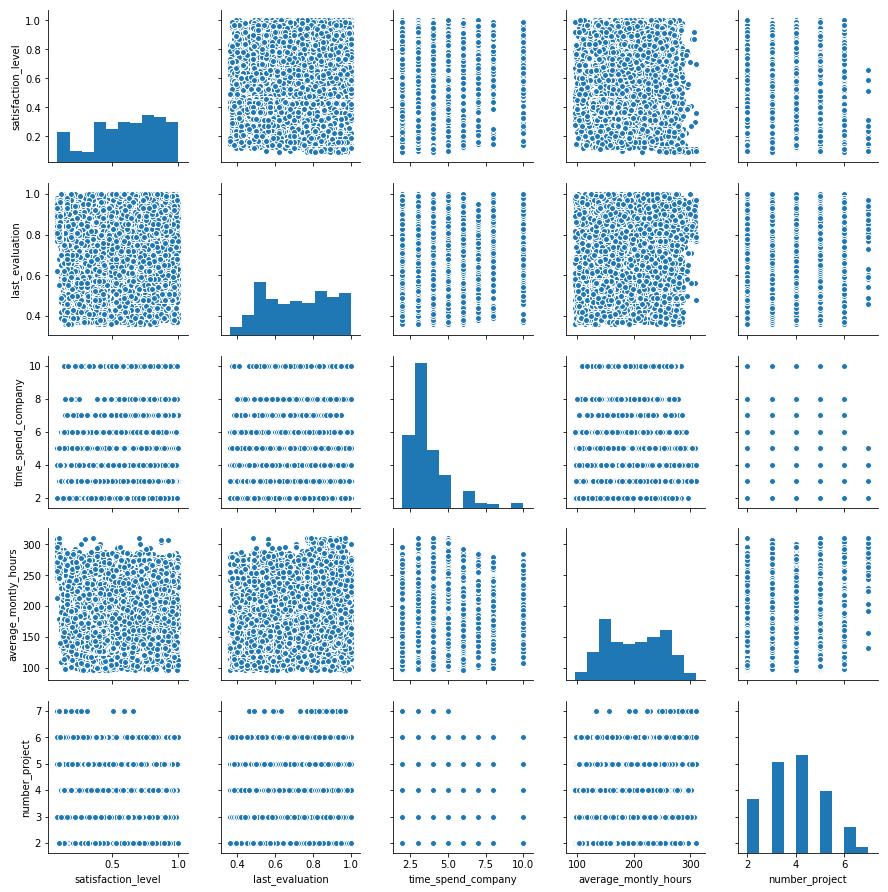

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
sns.pairplot(hr, vars=['satisfaction_level','last_evaluation', 'time_spend_company', 
                       'average_montly_hours',  'number_project'], kind='scatter')

# 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [9]:
from scipy import stats

Проверим предположение: средние значения количества проектов в отделе IT и HR равны

In [10]:
project_IT=hr[hr['sales'] == 'IT']['number_project']
project_HR=hr[hr['sales'] == 'hr']['number_project']
stats.ttest_ind(project_IT, project_HR)

Ttest_indResult(statistic=2.8357885233245397, pvalue=0.004618099160733461)

pvalue=0.004618099160733461 и у нас достаточно оснований отвергнуть данное предположение

Проверим предположение: средние значения количества лет, проведенных в компании, в отделе IT и HR равны

In [11]:
time_IT=hr[hr['sales'] == 'IT']['time_spend_company']
time_HR=hr[hr['sales'] == 'hr']['time_spend_company']
stats.ttest_ind(time_IT, time_HR)

Ttest_indResult(statistic=1.8291467985189855, pvalue=0.06752917069625797)

 pvalue=0.06752917069625797 и у нас недостаточно оснований отвергать данное предположение

# 6. Рассчитать сколько работников работает в каждом департаменте

In [12]:
hr['sales'].value_counts().sort_values(ascending=False)

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

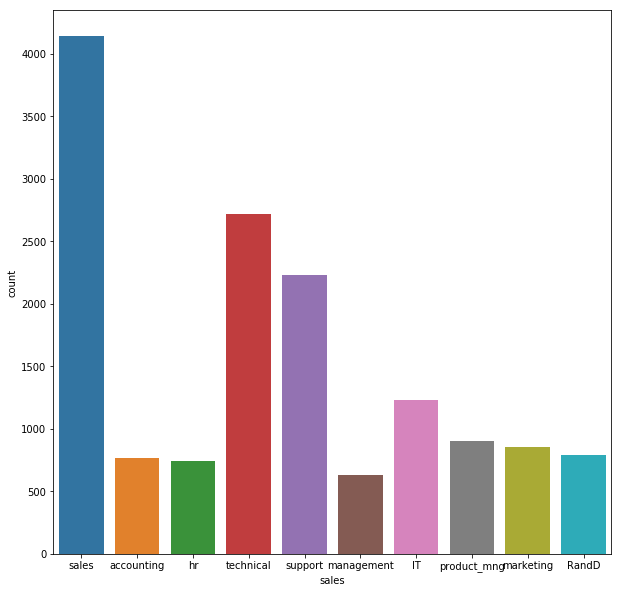

In [13]:
sns.countplot(hr['sales'])

# 7. Показать распределение сотрудников по зарплатам

In [14]:
hr['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

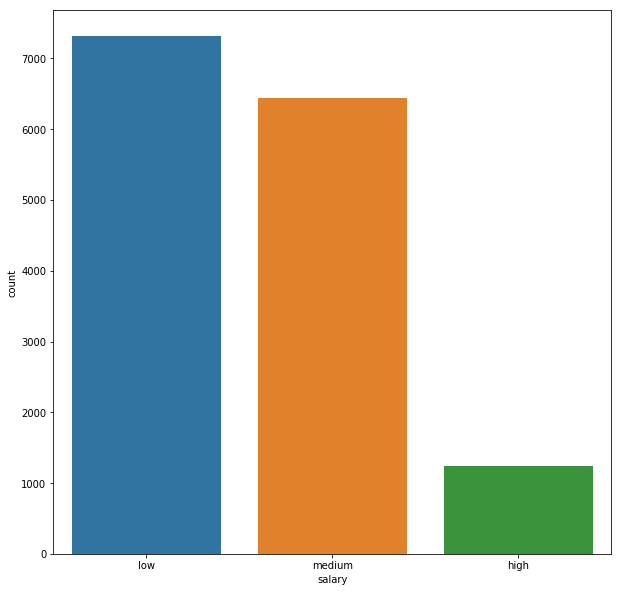

In [15]:
sns.countplot(hr['salary'])

# 8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [16]:
hr.groupby(['sales', 'salary']).count()['satisfaction_level']

sales        salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: satisfaction_level, dtype: int64

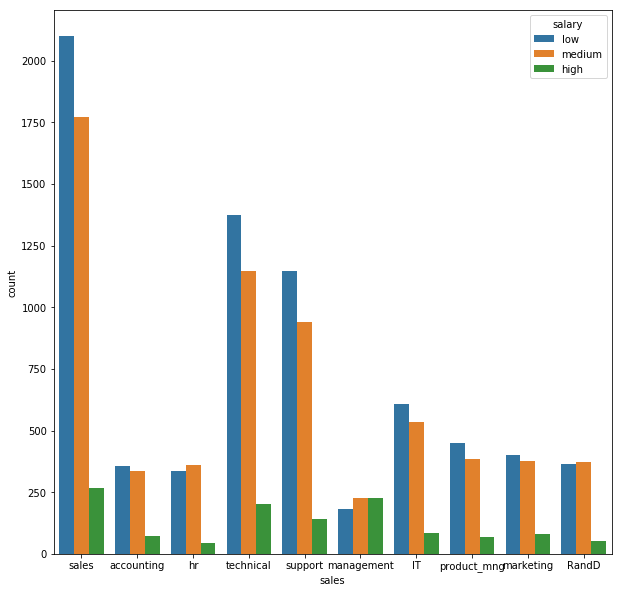

In [17]:
sns.countplot(x='sales', hue='salary', data=hr)

# 9. Сколько сотрудников покинули компанию

In [18]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

# 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [19]:
hr_left_1=hr[hr['left'] == 1]
hr_left_0=hr[hr['left'] == 0]

In [20]:
hr_left_0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.0,0.159889
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


In [21]:
hr_left_1.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


In [22]:
hr_left_1['satisfaction_level'].mean()

0.44009801176140917

In [23]:
hr_left_0['satisfaction_level'].mean()

0.666809590479516

Видно, что уровень удовлетворенности работой у тех, кто ушел ниже, чем у тех, кто остался.

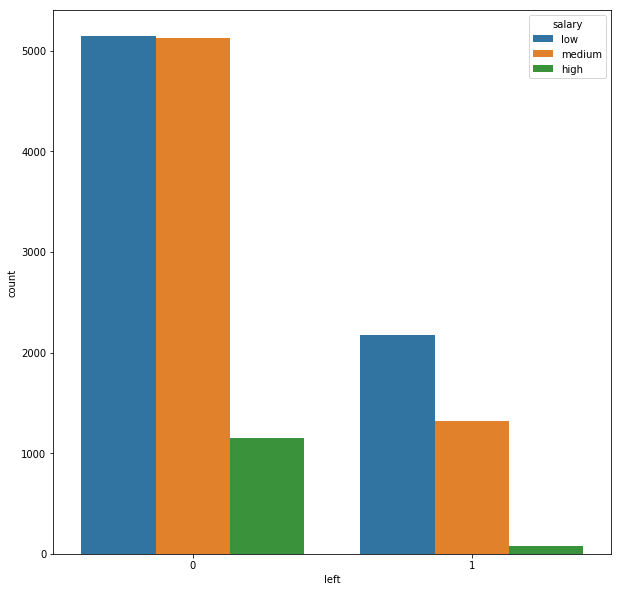

In [24]:
sns.countplot(x="left", hue="salary", data=hr)

In [25]:
hr_left_0['salary'].value_counts()*100/hr_left_0['salary'].count()

low       45.012251
medium    44.880994
high      10.106755
Name: salary, dtype: float64

In [26]:
hr_left_1['salary'].value_counts()*100/hr_left_1['salary'].count()

low       60.823299
medium    36.880426
high       2.296276
Name: salary, dtype: float64

Можно заметить, что распределение зарплаты у тех, кто остался и у тех, кто ушел, разное. Из ушедших всего лишь 2% получали высокую зарплату.

In [27]:
hr_left_0['promotion_last_5years'].value_counts()*100/hr_left_0['promotion_last_5years'].count()

0    97.374869
1     2.625131
Name: promotion_last_5years, dtype: float64

In [28]:
hr_left_1['promotion_last_5years'].value_counts()*100/hr_left_1['promotion_last_5years'].count()

0    99.467936
1     0.532064
Name: promotion_last_5years, dtype: float64

Видно, что и карьерный рост у ушедших не наблюдался. Хотя и у оставшихся он не сильно наблюдается.

In [29]:
hr_left_0['average_montly_hours'].mean()

199.0602030101505

In [30]:
hr_left_1['average_montly_hours'].mean()

207.41921030523662

Видно, что ушедшие проводили за работой больше времени, чем те, кто остались.

In [31]:
hr_left_0['time_spend_company'].value_counts()*100/hr_left_0['time_spend_company'].count()

3     42.500875
2     27.922646
4     14.586979
5      5.600280
6      4.453973
10     1.872594
7      1.645082
8      1.417571
Name: time_spend_company, dtype: float64

In [32]:
hr_left_1['time_spend_company'].value_counts()*100/hr_left_1['time_spend_company'].count()

3    44.413330
4    24.922991
5    23.326799
6     5.852702
2     1.484178
Name: time_spend_company, dtype: float64

Из всего вышеперечисленного можно сделать вывод, что сотрудники уволнялись из-за низкой удовлетворенности работой, которая складывалась из низкой заработной платы, большой загруженности на работе и отсутствия карьерного роста.